In [1]:
%%html
<style>@font-face{font-family:myFont;src:url(v.ttf)}div.text_cell{font-family:myFont;direction:rtl;text-align:center;}</style>

# «به نام خدا»
## هوش مصنوعی 
## تمرین کامپیوتری شماره پنج - فاز اول
## پیاده سازی و آموزش شبکه های عصبی Feed Forward
### امیرحسین دبیری اقدم - 810098024
### استاد: دکتر فدایی
#####  دانشگاه تهران - پاییز 99
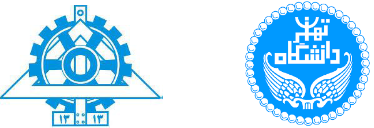
***

###  هدف پروژه  
<p dir="rtl" style="text-align: right;">هدف از این پروژه پیاده سازی شبکه های عصبی چندلایه Feed Forward جهت طبقه بندی تصاویر دیتاست Fashion Mnist (شامل تصاویری با سایز 28 در 28 پیکسل از 10 نوع لباس مختلف) بود؛ همچنین تأثیر چندی از پارامترها در فرایند یادگیری بررسی شد.</p>

### پیاده سازی پروژه


<p style="text-align: right;" dir="rtl"><strong> ایمپورت کردن داده ها و کتابخانه های مورد نیاز</strong></p>

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn') # beautiful plots :O

In [3]:
#importing data
train_data = pd.read_csv("trainData.csv", header=None)
train_labels = pd.read_csv("trainLabels.csv", header=None) 
test_data = pd.read_csv("testData.csv", header=None)
test_labels = pd.read_csv("testLabels.csv", header=None) 

In [4]:
#data frame to numpy array
train_data = train_data.to_numpy()
train_labels = train_labels.to_numpy()
test_data = test_data.to_numpy()
test_labels = test_labels.to_numpy()

<p style="text-align: right;" dir="rtl"><strong>مرحله اول: بررسی و پیش پردازش داده ها</strong></p>

<p style="text-align: right;" dir="rtl">- گام یک</p>

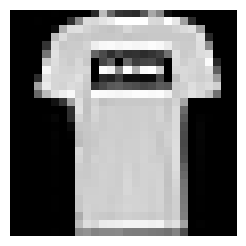

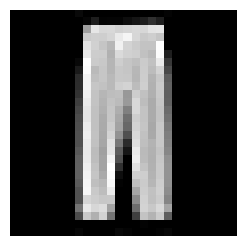

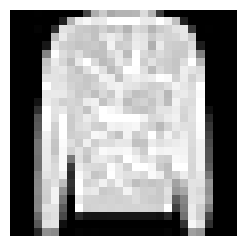

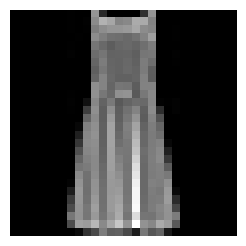

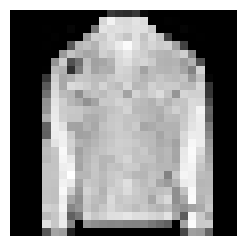

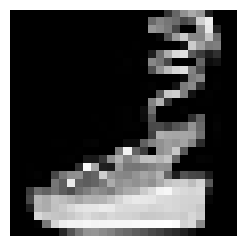

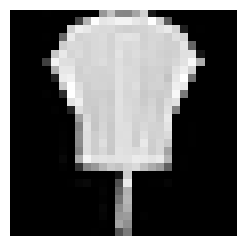

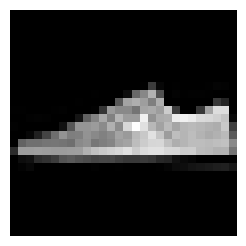

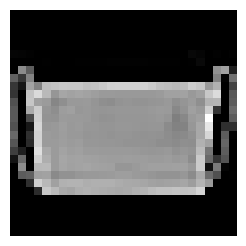

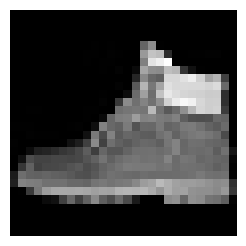

In [114]:
for i in range(10):
    image = train_data[np.where(train_labels == i)[0][i]]
    im = np.array(image)
    im.resize(28,28)
    plt.figure(figsize=[3,3])
    plt.axis('off')
    plt.imshow(im, cmap='gray')
    plt.grid(False)
    plt.show()

<p style="text-align: right;" dir="rtl">- گام دو</p>

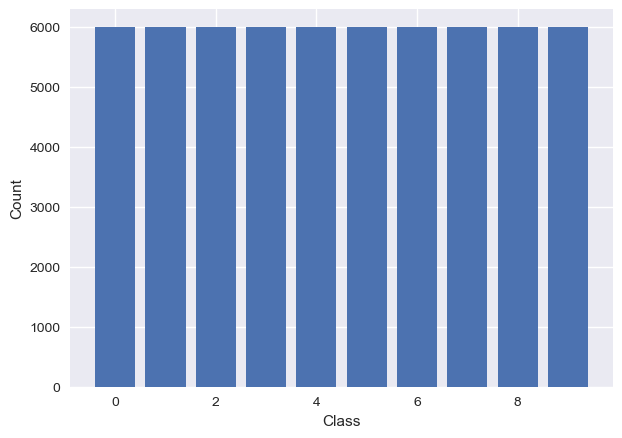

In [109]:
#Train data
plt.figure(figsize=[7,5])
plt.bar(np.unique(train_labels, return_counts=1)[0], np.unique(train_labels, return_counts=1)[1])
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

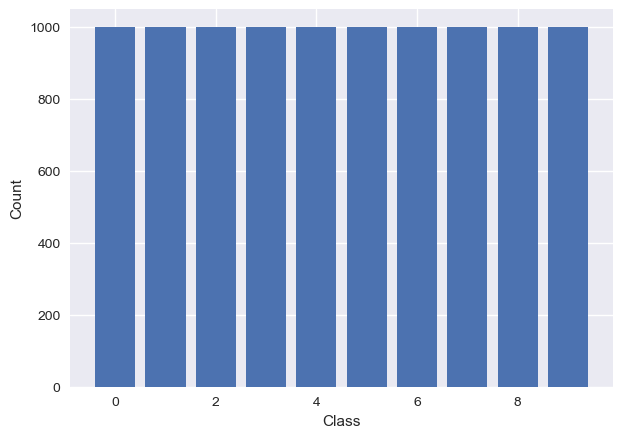

In [27]:
#test data
plt.figure(figsize=[7,5])
plt.bar(np.unique(test_labels, return_counts=1)[0], np.unique(test_labels, return_counts=1)[1])
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

<p dir="rtl" style="text-align: right;">مشاهده میشود که دیتاست بالانس است و همه کلاسها تعداد یکسانی عکس دارند.</p>

<p style="text-align: right;" dir="rtl">- گام سه</p>

In [8]:
#Normalize
train_data_normal = train_data/255
test_data_normal = test_data/255

<p style="text-align: right;" dir="rtl">مزیت نرمالایز کردن این است که باعث میشود سرعت یادگیری شبکه افزایش پیدا کند و نیز احتمال رخ دادن overflow را هم کاهش میدهد و به اصطلاح شبکه از لحاظ عددی stable میشود.</p>
<p style="text-align: right;" dir="rtl">به بیان دیگر اگر اسکیل دیتا ها درست نباشد نسبت به هم، ممکن است باعث ایجاد بایاس شود (مثلا یک داده که مقادیر بزرگی دارد اثر بیشتری نسبت به بقیه داده ها داشته باشد در صورتی که در واقعیت این داده بر بقیه داده ها ارجحیت ندارد) همچنین ممکن است باعث gradient explosion شود و میتواند باعث ایجاد اختلال در فرآیند یادگیری شود مثلا وزنهای بدست آمده بزرگ شوند و سیستم خیلی ناپایدار شود و با اندک تغییر ورودی خروجی آن خیلی تغییر کند و...</p>

<p style="text-align: right;" dir="rtl"><strong>مرحله دوم: تکمیل بخشهای ناقص شبکه عصبی</strong></p>

<p dir="rtl" style="text-align: right;">بخش های TODO کد داده شده را کامل کردیم که در ادامه آمده است:</p>

<h2 style="text-align: center;">Dataloader</h2>

In [9]:
class Dataloader:
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        # TODO: Implement
        onehot_vectors = np.zeros((len(labels), n_classes))
        for i in range(onehot_vectors.shape[0]):
            onehot_vectors[i, labels[i]] = 1
        
        return onehot_vectors
    
    def __shuffle_dataset(self):
        # TODO: Implement
        temp = list(zip((self.__data), self.__onehot_labels))
        np.random.shuffle(temp)
        self.__data, self.__onehot_labels = zip(*temp)
    
    def __iter__(self):
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

<h2 style="text-align: center;">Activation Functions</h2>

In [34]:
class Identical:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    

class Relu:
    
    def __init__(self): pass
    
    def __relu(self, matrix):
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        relu_value = np.where(temp > 0, temp, 0)
        return relu_value

    def derivative(self, matrix):
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        relu_derivative = np.where(temp > 0, 1, 0)
        return relu_derivative
    
    def __call__(self, matrix):
        return self.__relu(matrix)

    
class LeakyRelu:
    
    def __init__(self, negative_slope=0.01):
        self.negative_slope = negative_slope
    
    def __val(self, matrix):
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        leaky_relu_value = np.where(temp > 0, temp, temp * self.negative_slope)
        return leaky_relu_value

    def derivative(self, matrix):
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        leaky_relu_derivative = np.where(temp > 0, 1, self.negative_slope)
        return leaky_relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class Sigmoid:
    
    def __init__(self): pass

    def __val(self, matrix):
        # TODO: Implement
        sigmoid_value = np.matrix(1 / (1 + np.exp(-matrix)), dtype=float)
        return sigmoid_value

    def derivative(self, matrix):
        # TODO: Implement
        val = self.__val(matrix)
        sigmoid_derivative = np.multiply(val, (1 - val))
        return sigmoid_derivative 
    
    def __call__(self, matrix):
        return self.__val(matrix)


class Softmax: #(Stable Softmax)
    
    def __init__(self): pass

    def __val(self, matrix):
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        temp = temp - np.amax(temp, axis=1)
        exp = np.exp(temp)
        softmax_value =  np.multiply(exp ,1/np.sum(exp, axis=1))
        return softmax_value
    
    def __call__(self, matrix):
        return self.__val(matrix)

<h2 style="text-align: center;">Loss Function</h2>

In [11]:
class CrossEntropy: #(with softmax)
    
    def __init__(self): pass

    def __val(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        # TODO: Implement
        activation = Softmax()
        softmax_value = activation(true_val) 
        cross_entropy_value = - np.sum(np.multiply(expected_val, np.log(softmax_value)), axis=1)
        return cross_entropy_value 
        
    def derivative(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        # TODO: Implement
        activation = Softmax()
        softmax_value = activation(true_val)
        cross_entropy_derivative = softmax_value - expected_val
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        return self.__val(true_val, expected_val)

<h2 style="text-align: center;">Layer</h2>

<p dir="rtl" style="text-align: right;">از همان نمادها که در فایل داده شده بود استفاده میکنیم و اینجا فقط یک تفاوت وجود دارد و آن اینکه y به صورت زیر تعریف میشود زیرا در اینجا activation function&nbsp; هم داریم:</p>

<p>$$y= \left (y_{1,1} \; y_{1,2} \; y_{1,3} \right)=f(xw)$$</p>

<p dir="rtl" style="text-align: right;">در ادامه گرادیان Loss را نسبت به وزنها و ورودی ها بدست آورده ایم که همه چیز مشابه قبل است و فقط مشتق f در بعضی قسمتها باید به صورت درایه به درایه در ماتریسمان ضرب شود. (نماد *. نشانگر این موضوع است)</p>

<p>$$\frac{\partial L}{\partial w_{1,1}} = \frac{\partial L}{\partial y} \frac{\partial y}{\partial w_{1,1}} = \left (dy_{1,1} \; dy_{1,2} \; dy_{1,3} \right) \begin{pmatrix}
 \frac{\partial y_{1,1}}{\partial w_{1,1}} & \frac{\partial y_{1,2}}{\partial w_{1,1}}  & \frac{\partial y_{1,3}}{\partial w_{1,1}} 
\end{pmatrix} = \left (dy_{1,1} \; dy_{1,2} \; dy_{1,3} \right) \left ( \frac{\partial f}{\partial a _{1,1}}.x_{1,1} \; \frac{\partial f}{\partial a_{1,2}}.0 \; \frac{\partial f}{\partial a_{1,3}}.0\right) = dy_{1,1}\frac{\partial f}{\partial a_{1,1}}x_{1,1}+0+0\Rightarrow \frac{\partial L}{\partial W} =x^{T}(\frac{\partial L}{\partial W} .* \frac{\partial f}{\partial a}) $$</p><hr />

<p>$$\frac{\partial L}{\partial x_{1,1}} = \frac{\partial L}{\partial y} \frac{\partial y}{\partial x_{1,1}} = \left (dy_{1,1} \; dy_{1,2} \; dy_{1,3} \right) \begin{pmatrix}
 \frac{\partial y_{1,1}}{\partial x_{1,1}} & \frac{\partial y_{1,2}}{\partial x_{1,1}}  & \frac{\partial y_{1,3}}{\partial x_{1,1}} 
\end{pmatrix} = \left (dy_{1,1} \; dy_{1,2} \; dy_{1,3} \right) \left ( \frac{\partial f}{\partial a _{1,1}}w_{1,1} \; \frac{\partial f}{\partial a_{1,2}}w_{1,2} \; \frac{\partial f}{\partial a_{1,3}}w_{1,3} \right) = dy_{1,1}\frac{\partial f}{\partial a_{1,1}}w_{1,1}+dy_{1,2}\frac{\partial f}{\partial a_{1,2}}w_{1,2}+dy_{1,3}\frac{\partial f}{\partial a_{1,3}}w_{1,3}\Rightarrow  \frac{\partial L}{\partial x}=(\frac{\partial L}{\partial y} .* \frac{\partial f}{\partial a}) w^{T}$$</p>
<hr />


<p dir="rtl" style="text-align: right;">$$\frac{\partial L}{\partial y}$$ نماد فوق همان backprop_tensor است که به تابع update_weights داده میشود؛ همچنین در مورد bias هم همان روابط فوق برقرار است زیرا میتوان فرض کرد بایاس هم وزن است اما به جای ضرب در ورودی لایه قبل همیشه در مقدار ثابت یک ضرب میشود بنابراین در روابط بالا به جای $$x^{T}$$ ماتریسی که همه درایه های آن یک است قرار میدهیم ...</p>

In [12]:
class Layer:

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, 
                 activation=Identical(), initial_weight='uniform', **initializing_parameters):
        
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
            
        assert type(initial_weight)==str, 'Undefined activation function!'
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'
        
        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        # TODO: Implement
        self.__last_input = layer_input
        self.__last_activation_input = np.dot(self.__last_input, self.__weight) + self.__bias
        self.__last_activation_output = self.activation(self.__last_activation_input)
        self.__last_activation_derivative = self.activation.derivative(self.__last_activation_input)
        return np.matrix(self.__last_activation_output)
    
    def update_weights(self, backprop_tensor, lr):
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        # TODO: Implement
        temp1 = np.multiply(backprop_tensor, self.__last_activation_derivative)
        l_wrt_w = np.dot(self.__last_input.T, temp1)
        l_wrt_b =  np.dot(np.ones([1, np.size(temp1,0)]), temp1)
        
        self.__weight -= lr * l_wrt_w
        self.__bias -= lr * l_wrt_b
        
        backprop_tensor = np.dot(temp1, self.__weight.T)
        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        # TODO: Implement
        weights = np.random.uniform(low=low, high=high, size=(dim1, dim2))
        return weights
    
    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        # TODO: Implement
        weights = np.random.normal(loc=mean, scale=var, size=(dim1, dim2))
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

<h2 style="text-align: center;">Feed Forward Neural Network</h2>

In [13]:
class FeedForwardNN:
    
    def __init__(self, input_shape):
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    

    def forward_1(self, network_input):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        # TODO: Implement
        network_output = network_input
        for layer in self.__layers_list[:-1]:
            network_output = layer.forward(network_output)
            
        return network_output
    
    def forward(self, network_input):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        # TODO: Implement
        network_output = network_input
        for layer in self.__layers_list:
            network_output = layer.forward(network_output)
            
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        # TODO: Implement
        network_outputs = self.forward(x_batch)
        losses = self.__loss(network_outputs, y_batch)
        self.__update_weights(network_outputs, y_batch)
        batch_accuracy = self.__compute_accuracy(self.__get_labels(network_outputs), self.__get_labels(y_batch))
        batch_average_loss = np.mean(losses)  
        
        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        # TODO: Implement
        network_outputs = self.forward(x_batch)
        losses = self.__loss(network_outputs, y_batch)
        batch_accuracy = self.__compute_accuracy(self.__get_labels(network_outputs), self.__get_labels(y_batch))
        batch_average_loss = np.mean(losses)  
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        # TODO: Implement
        labels = np.argmax(outputs, axis=1)
        return labels
    
    
    def __compute_accuracy(self, outputs, expected_outputs):
        # TODO: Implement
        accuracy = np.sum(outputs == expected_outputs) / len(outputs)
        return accuracy
    
    
    def __update_weights(self, output, y_train):
        # TODO: Implement
        n_layers = len(self.__layers_list)
        L_wrt_yn = self.__loss.derivative(output, y_train)
        L_wrt_yi_1 = self.__layers_list[-1].update_weights(L_wrt_yn, self.__lr)
        for i in range(1, n_layers):
            L_wrt_yi_1 = self.__layers_list[n_layers - 1 - i].update_weights(L_wrt_yi_1, self.__lr)
        return

<p style="text-align: right;" dir="rtl"><strong>مرحله سوم: طبقه بندی داده ها</strong></p>

<p dir="rtl" style="text-align: right;">- گام یک: با اضافه کردن دو لایه به شبکه و تنظیم درست مقدارLearning Rate (با آزمون و خطا) و توزیع وزنهای اولیه به صورت یکنواخت به دقت قابل قبول 85% بر روی داده های train&nbsp; و test میرسیم:</p>

In [52]:
np.random.seed(810098024)

INPUT_SHAPE = 28 * 28
LEARNING_RATE = 0.0001
EPOCHS = 30
BATCHS = 32
TRAINLOADER = Dataloader(train_data_normal, train_labels, 10, BATCHS, shuffle=True)
TESTLOADER = Dataloader(test_data_normal, test_labels, 10, BATCHS, shuffle=False) 

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=LeakyRelu(), weight_initializer='uniform')

network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.32415	Average Loss: 1.8360834055685056
	Test: Average Accuracy: 0.5629992012779552	Average Loss: 1.2421348769782663
Epoch 2:
	Train: Average Accuracy: 0.6239333333333333	Average Loss: 1.0287146259836282
	Test: Average Accuracy: 0.6705271565495208	Average Loss: 0.8889440159811285
Epoch 3:
	Train: Average Accuracy: 0.7008	Average Loss: 0.81201739169007
	Test: Average Accuracy: 0.7207468051118211	Average Loss: 0.7717627297248819
Epoch 4:
	Train: Average Accuracy: 0.7427666666666667	Average Loss: 0.7182684347573541
	Test: Average Accuracy: 0.7544928115015974	Average Loss: 0.699405092586603
Epoch 5:
	Train: Average Accuracy: 0.7674166666666666	Average Loss: 0.6554185649276726
	Test: Average Accuracy: 0.7702675718849841	Average Loss: 0.6498373471391268
Epoch 6:
	Train: Average Accuracy: 0.7862	Average Loss: 0.6125293429865326
	Test: Average Accuracy: 0.7869408945686901	Average Loss: 0.6134236044419061
Epoch 7:
	Train: Average Accuracy: 0.7982	Average Loss

<p dir="rtl" style="text-align: right;">- گام دوم: با دورشدن مقدار Learning Rate از مقدار بهینه آن آموزش شبکه مختل میشود و شبکه همگرا نمیشود یا سرعت همگرایی آن به شدت کاهش می یابد زیرا که ما از روش <span>stochastic gradient descent</span><strong>&nbsp;</strong>استفاده کردیم که در این روش وزنها با توجه به تغییرات تابع loss و براساس مقدار Learning Rate آپدیت میشوند و لذا اگر لرنینگ ریت خیلی کوچک باشد وزنها خیلی تغییرات اندکی دارند و حتی ممکن است باعث gradient vanish بشود و نیز ممکن است در یک نقطه اپتیمال لوکال گیر بکند و از طرفی اگر لرنینگ ریت بزرگ باشد ممکن است به نقطه بهینه همگرا نشود و حول نقطه بهینه نوسان کند و یا حتی دچار gradient explosion شده و شبکه ناپایدار شود لذا انتخاب مقدار بهینه برای Learning Rate اهمیت زیادی دارد که با توجه به معماری شبکه و دیتاست مسئله و... مقدار آن را باید مشخص کرد</p>

In [46]:
log, log_10x, log_0_1_x

({'train_accuracy': [0.32416666666666666,
   0.6239333333333333,
   0.7008,
   0.7427666666666667,
   0.7674166666666666,
   0.7861833333333333,
   0.7981666666666667,
   0.8080833333333334,
   0.8153,
   0.8194833333333333,
   0.8243333333333334,
   0.8270666666666666,
   0.8285,
   0.8303666666666667,
   0.8338,
   0.8362,
   0.8369333333333333,
   0.838,
   0.8408833333333333,
   0.8416166666666667,
   0.8431666666666666,
   0.8430833333333333,
   0.84395,
   0.8452666666666667,
   0.8468166666666667,
   0.8471666666666666,
   0.8484666666666667,
   0.84855,
   0.84895,
   0.84995],
  'train_loss': [1.8361025740699775,
   1.0287518089371572,
   0.812039809727593,
   0.7182879925595023,
   0.6554342240098577,
   0.6125454204130117,
   0.5797830630652395,
   0.5552460108354458,
   0.5365408230650465,
   0.521722899316573,
   0.5090320553125429,
   0.499141837069548,
   0.4913158768882531,
   0.48403312766515305,
   0.4773223897628612,
   0.4723547288683217,
   0.46833369515218315,
   

<p dir="rtl" style="text-align: right;">نتیجه این شد که وقتی Learning Rate را 10 برابر مقدار بهینه قرار دادیم عملکرد شبکه مختل شد و اصلا به نقطه درست همگرا نشد و دقت آن 10 درصد شد که یعنی خروجی آن به ازای تمام ورودی ها یک مقدار بود (همه عکس هارا در یک کلاس پیش بینی میکرد)&nbsp;</p>
<p dir="rtl" style="text-align: right;">وقتی Learning Rate را 0.1 مقدار بهینه قرار دادیم سرعت همگرایی شبکه کاهش یافت و با تعداد 30 ایپاک دقت لرنینگ ریت اصلی به حدود 85% میرسید اما در اینجا به حدود 72% میرسد که احتمالا اگر تعداد epoch ها را افزایش دهیم به همان دقت حدود 85% میرسیم.</p>

<p dir="rtl" style="text-align: right;">- گام سوم:</p>

In [47]:
log,log_Leaky,log_sigmoid

({'train_accuracy': [0.32416666666666666,
   0.6239333333333333,
   0.7008,
   0.7427666666666667,
   0.7674166666666666,
   0.7861833333333333,
   0.7981666666666667,
   0.8080833333333334,
   0.8153,
   0.8194833333333333,
   0.8243333333333334,
   0.8270666666666666,
   0.8285,
   0.8303666666666667,
   0.8338,
   0.8362,
   0.8369333333333333,
   0.838,
   0.8408833333333333,
   0.8416166666666667,
   0.8431666666666666,
   0.8430833333333333,
   0.84395,
   0.8452666666666667,
   0.8468166666666667,
   0.8471666666666666,
   0.8484666666666667,
   0.84855,
   0.84895,
   0.84995],
  'train_loss': [1.8361025740699775,
   1.0287518089371572,
   0.812039809727593,
   0.7182879925595023,
   0.6554342240098577,
   0.6125454204130117,
   0.5797830630652395,
   0.5552460108354458,
   0.5365408230650465,
   0.521722899316573,
   0.5090320553125429,
   0.499141837069548,
   0.4913158768882531,
   0.48403312766515305,
   0.4773223897628612,
   0.4723547288683217,
   0.46833369515218315,
   

<p dir="rtl" style="text-align: right;">از نتایج فوق مشاهده میشود که استفاده از LeakyRelu اندکی دقت بیشتری نسبت به Relu میدهد زیرا که LeakyRelu&nbsp; بر عکس Relu برای مقادیر منفی هم یک مقدار (هرچند اندک) خروجی میدهد و بنابراین سبب میشود احتمال صفر شدن gradient کاهش یابد (دراین حالت ممکن است بعضی نورون ها اصطلاحا dead شوند زیرا gradient&nbsp; آنها صفر شده و در نتیجه وزن آنها تغییری نیمکند) و درنهایت شبکه اندکی flexible تر شده و کمی بهتر بتواند ترند دیتاست ورودی را یادبگیرد.</p>
<p dir="rtl" style="text-align: right;">Sigmoid و tanh معمولا وقتی استفاده میشوند که یک binary classification داشته باشیم (همچنین اگر یک ورودی بتواند متعلق به چندین دسته باشد نیز کاربرد دارد) اما در این مسئله که یک ورودی باید در نهایت متعلق فقط به یک کلاس تشخیص داده شود نمیتوان از آن استفاده کرد چون به نوعی خیلی غیرخطی است و نیز چون خروجی آن محدود به بازه 0 تا 1 است به سرعت اشباع میشود یعنی مقادیر بزرگ همه به عددی نزدیک 1 تبدیل شده و مقادیر کوچک همه به عدد 0 (در siigmoid) و -1 (در tanh) و درنتیجه&nbsp; برای چندین کلاس مناسب نیستند.</p>

<p dir="rtl" style="text-align: right;">- گام چهارم:</p>

In [45]:
log_16, log_128

({'train_accuracy': [0.3280166666666667,
   0.6255666666666667,
   0.7012,
   0.7429,
   0.7674166666666666,
   0.7871833333333333,
   0.7993333333333333,
   0.80905,
   0.81625,
   0.8206333333333333,
   0.8249833333333333,
   0.8272,
   0.8288,
   0.8315,
   0.8347,
   0.83605,
   0.8381666666666666,
   0.8397666666666667,
   0.8410166666666666,
   0.8423,
   0.8431333333333333,
   0.84425,
   0.84515,
   0.8461833333333333,
   0.8477666666666667,
   0.8485333333333334,
   0.8491666666666666,
   0.8499333333333333,
   0.8500666666666666,
   0.8512833333333333],
  'train_loss': [1.8347325137615338,
   1.0270180050809423,
   0.810912549034996,
   0.7170462834235579,
   0.6550127632346942,
   0.6114374532597371,
   0.5785713989190018,
   0.5542620487780497,
   0.5350122455124886,
   0.5205646281107248,
   0.5076083271872889,
   0.49750515412647195,
   0.4900820566144004,
   0.482659644480114,
   0.47584330028503485,
   0.47128617466040285,
   0.46672506270804676,
   0.4618161076246516,


<p dir="rtl" style="text-align: right;">در حالت کلی به دلیل محدویت حافظه و... ممکن است نتوان کل داده را وارد شبکه کرد و باید به صورت مینی بج این کار انجام گیرد؛ همچنین سایز بچ اگر خیلی بزرگ باشد ممکن است باعث شود شبکه نتواند به خوبی generalize شود یعنی ممکن است باعث overfitting شود و شبکه داده train را با نویزهایش حفظ کند و نتیجه خوبی بدهد اما برای داده جدید را نتیجه مطلوبی ندهد و دقت پایینی داشته باشد، البته علاوه بر سایز بچ دفعاتی که داده به شبکه داده میشود (epoch) نیز در overfit شدن شبکه تاثیر بسزایی دارد.</p>
<p dir="rtl" style="text-align: right;">با استفاده از بچ سایز مناسب میتوان کاری کرد که شبکه شروع به یادگیری کند بدون اینکه همه داده ها را ببیند و در نتیجه نویز داده ها هم اثر کمتری داشته و شبکه بهتر generalize بشود.</p>
<p dir="rtl" style="text-align: right;">اگر بچ سایز خیلی کوچک باشد ممکن است باعث شود که شبکه در یک اپتیمال لوکال گیر کند و یا سرعت همگرایی آن کاهش یابد زیرا وزنهای آن تحت تاثیر تعداد داده اندک تغییر میکند و اگر داده ها بر نخورده باشند (shuffle) این وضعیت بدتر هم میشود.</p>
<p dir="rtl" style="text-align: right;">به طور کلی یک trade off وجود دارد و براساس مسئله و ... باید یک بچ سایز مناسب پیدا کرد که هم شبکه overfit نشود و هم سرعت خوبی در همگرایی داشته باشد.</p>
<p dir="rtl" style="text-align: right;">از نتایج بالا میبینیم که بچ سایز 32 و 16 تقریبا نتیجه یکسانی دارند اما بچ سایز 128 باعث کاهش دقت شده است(البته با تغییر لرنینگ ریت در این حالت میتوان به همان دقت رسید اما چون گفته شده پارامترها تغییر نکند آنرا تغییر نمیدهیم)&nbsp; لذا از اینجا به بعد همان بچ سایز 32 را استفاده میکنیم.</p>

<p dir="rtl" style="text-align: right;">- گام پنجم:</p>

<p dir="rtl" style="text-align: right;">با توجه به اینکه فرآیند یادگیری ما روی یک دیتاست محدود انجام میشود و روش یادگیری نیز براساس بروزرسانی وزنها با روش backpropagation است و لذا لازم است که داده ها را چندین بار از شبکه عبور داده و backpropagate کرد تا شبکه بتواند trend کلی دیتاست را یادبگیرد و به اصطلاح generalize شود و واضح است که با یکبار عبور داده ها وزنها مقداراپتیمال خود را پیدا نمیکنند و در نتیجه لازم است شبکه برای چند epoch آموزش ببیند البته اگر تعداد epoch ها خیلی زیاد شود هم باعث overfitting میشود و شبکه دیتا train را حفظ میکند که نامطلوب است.</p>
<p dir="rtl" style="text-align: right;">در ادامه تا 150 ایپاک شبکه را train میکنیم و میبینیم که Accuracy و Loss آن چگونه تغییر میکند:</p>

In [96]:
np.random.seed(810098024)

INPUT_SHAPE = 28 * 28
LEARNING_RATE = 0.0001
EPOCHS = 200
BATCHS = 32
TRAINLOADER = Dataloader(train_data_normal, train_labels, 10, BATCHS, shuffle=True)
TESTLOADER = Dataloader(test_data_normal, test_labels, 10, BATCHS, shuffle=False) 

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(10, activation=LeakyRelu(), weight_initializer='uniform')

network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log_overfit = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results=False)

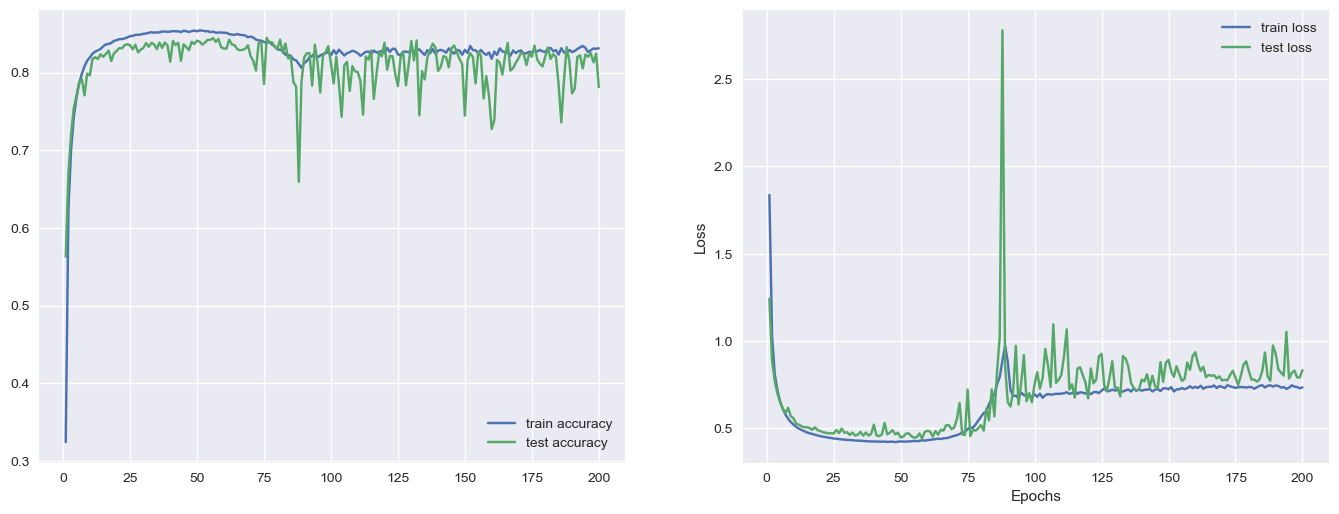

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)

#Accuracy
axes[0].plot(np.arange(1,EPOCHS+1), np.array(log_overfit['train_accuracy']), label='train accuracy')
axes[0].plot(np.arange(1,EPOCHS+1), np.array(log_overfit['test_accuracy']), label='test accuracy')
axes[0].legend()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
#Loss
axes[1].plot(np.arange(1,EPOCHS+1), np.array(log_overfit['train_loss']), label='train loss')
axes[1].plot(np.arange(1,EPOCHS+1), np.array(log_overfit['test_loss']), label='test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
axes[1].legend()
plt.show()


<p dir="rtl" style="text-align: right;">مشاهده میشود که از حدود 90 ایپاک به بعد فرآیند overfitting شروع میشود و از آنجا به بعد Accuracy داده test (و نیز Loss ) آن کاهش مییابد (البته حالت نوسانی دارد اما به طور کلی کاهش یافته که خوب نیست.)</p>
<p dir="rtl" style="text-align: right;">البته در حدود 30 الی 40 ایپاک Accuracy&nbsp; (و نیز Loss) هر رو داده test و train ماکسیمم است لذا نقطه اپتیمال در همان بازه میباشد و بهتر است بیشتراز آن شبکه train نشود.</p>

<p style="text-align: right;" dir="rtl"><strong>مرحله چهارم: ترسیم داده های با بعد کاهش یافته</strong></p>

<p dir="rtl" style="text-align: right;">به کلاس فوق متد forward_1 را که خروجی شبکه در لایه یکی مانده به آخر را میدهد اضافه کردیم و یک شبکه با معماری گفته شده را با تیون کردن هایپر پارامترهای آن train کردیم و به دقت نسبتا مناسب 63% رسیدیم:</p>

In [90]:
np.random.seed(810098024)

INPUT_SHAPE = 28 * 28
LEARNING_RATE = 0.000035
EPOCHS = 30
BATCHS = 32

TRAINLOADER = Dataloader(train_data_normal, train_labels, 10, BATCHS, shuffle=False)
TESTLOADER = Dataloader(test_data_normal, test_labels, 10, BATCHS, shuffle=False) 

network2 = FeedForwardNN(INPUT_SHAPE)
network2.add_layer(10, activation=LeakyRelu(), weight_initializer='uniform')
network2.add_layer(2, activation=LeakyRelu(), weight_initializer='uniform')
network2.add_layer(10, activation=LeakyRelu(), weight_initializer='uniform')
network2.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log_2d = network2.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results=False)

<p dir="rtl" style="text-align: right;">نهایتاً خروجی لایه ی دوم شبکه ی آموزش داده شده را به ازای داده های آموزش و تست ترسیم کردیم:</p>

In [92]:
#network2 outputs
tr = network2.forward_1(train_data_normal) 
te = network2.forward_1(test_data_normal)

data_test = pd.DataFrame({"x": np.array(te[:,0]).flatten(), "y": np.array(te[:,1]).flatten(), "Class": test_labels.flatten()})
data_train = pd.DataFrame({"x": np.array(tr[:,0]).flatten(), "y": np.array(tr[:,1]).flatten(), "Class": train_labels.flatten()})

label_map = {0:'T-shirt', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

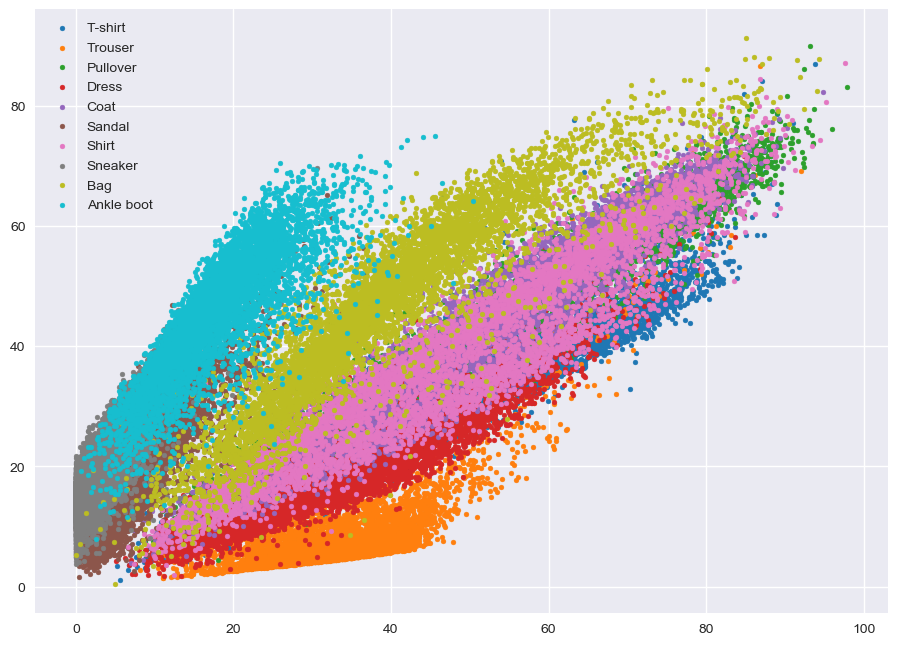

In [93]:
#train data
import matplotlib as mpl
colors = iter(mpl.cm.tab10(np.linspace(0, 1, 10)))

plt.figure(figsize=[11,8])
groups = data_train.groupby("Class")
for name, group in groups:
    plt.scatter(group["x"], group["y"], marker=".", label=label_map[name], color=next(colors))
    
plt.rcParams.update({'figure.figsize':(11,8), 'figure.dpi':100})
plt.legend()
plt.show()

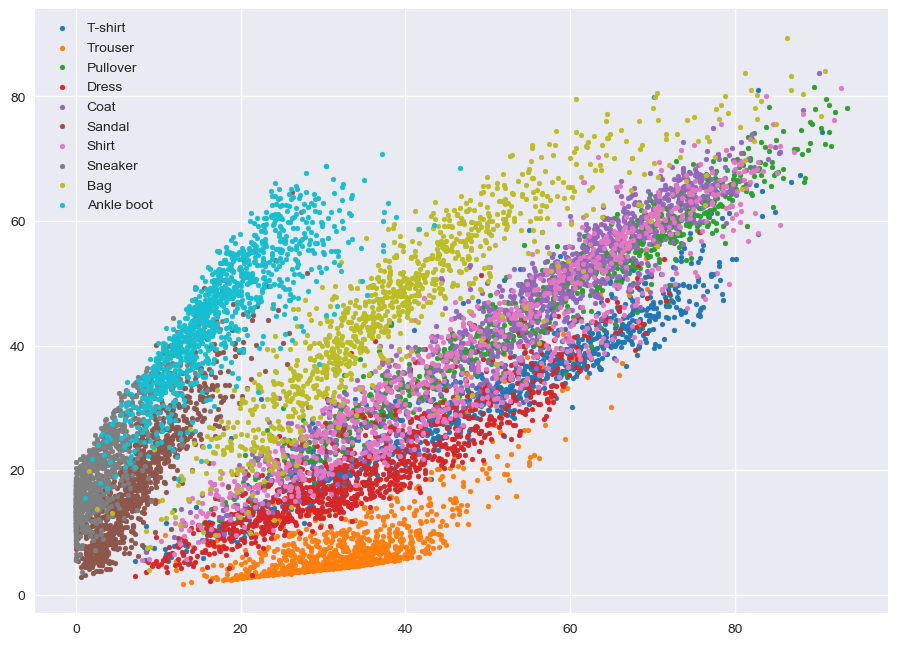

In [95]:
#test data
colors = iter(mpl.cm.tab10(np.linspace(0, 1, 10)))

plt.figure(figsize=[11,8])
groups = data_test.groupby("Class")
for name, group in groups:
    plt.scatter(group["x"], group["y"], marker=".",  label=label_map[name], color=next(colors))
    
plt.rcParams.update({'figure.figsize':(11,8), 'figure.dpi':100})
plt.legend()
plt.show()

<p dir="rtl" style="text-align: right;">با توجه به نمودارهای بدست آمده شبکه ما توانسته دسته های کلی را از هم تشخیص دهد یعنی پراکندگی داده ها به گونه ایست که کفشها در یک ناحیه، کیفها در یک ناحیه و لباسهای نیم تنه بالایی( تی شرت و پلیور و کت و...) در یک ناحیه و شلوار در یک ناحیه از صفحه دوبعدی قرار گرفته اند و شبکه با دقت خوبی توانسته انواع لباس هارا تشخیص بدهد اما شبکه در تفکیک اقسام کفش از هم (صندل-بوت-کتانی) عملکرد خوبی نداشته و نتواتسته آنطور که باید آنهارا از هم تفکیک کند و لذا با هم همپوشانی دارند همچنین است برای انواع لباس مثل تی شرت- پلیور-کت که اینهارا هم نتوانسته از هم تشخیص دهد البته dress (پیراهن) به دلیل اینکه بلندتر از بقیه انواع لباس است را تا حد خوبی توانسته از تیشرت و کت و... تمییز دهد.</p>
<p dir="rtl" style="text-align: right;">پس به طور کلی میتوان گفت شبکه انواع لباس های مختلف را از هم با دقت قابل قبولی تفکیک کرده اما اقسام مختلف یک نوع از لباس را نتوانسته که با توجه به دقت حدود 63% آن همین انتظار بهتری هم نداشتیم اما در کل عملکرد شبکه قابل قبول بوده و نمودارهای فوق راضی کننده است.</p>
<p dir="rtl" style="text-align: right;">*در این بخش یکبار هم از Sigmoid به عنوان activation استفاده کردم که همانطور که گفتیم برای این multi class classification مناسب نبود و تقریبا همه داده ها در یک ناحیه باریک قرار داشتند و عملا تفکیک آنها از هم ممکن نبود که به دلیل اینکه نمودار آن چیزی برای نحلیل ندارد صرفا نتیجه آنرا ذکر کردیم.</p>